## Question 1
### Programmatically download and load into your favorite analytical tool the trip data for September 2015.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib
from bs4 import BeautifulSoup

In [2]:
r = urllib.urlopen('http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml').read()
soup = BeautifulSoup(r)
print type(soup)

<class 'bs4.BeautifulSoup'>


In [18]:
## find all links related to Green
soup.find_all("a",href=True, text='Green')

[<a href="https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2016-01.csv">Green</a>,
 <a href="https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2016-02.csv">Green</a>,
 <a href="https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2016-03.csv">Green</a>,
 <a href="https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2016-04.csv">Green</a>,
 <a href="https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2016-05.csv">Green</a>,
 <a href="https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2016-06.csv">Green</a>,
 <a href="https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-01.csv">Green</a>,
 <a href="https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-02.csv">Green</a>,
 <a href="https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-03.csv">Green</a>,
 <a href="https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-04.csv">Green</a>,
 <a href="https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-05.csv"

In [31]:
# Use regular expression to find the link for 2015-09 green taxi data
import re
p=re.compile("2015-09.csv")
for link in soup.find_all("a",href=True, text='Green'):
    if p.search (link['href']):
        assert(link['href']=='https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-09.csv')
        print link['href']
        download_link=link['href']
     

https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-09.csv


In [34]:
# Download data
filename=download_link.split("/")[5]
print filename
urllib.urlretrieve (download_link, filename)
print "download successfully"

green_tripdata_2015-09.csv


('green_tripdata_2015-09.csv',
 <httplib.HTTPMessage instance at 0x000000000D6754C8>)

In [2]:
# load data
data=pd.read_csv("green_tripdata_2015-09.csv")
data.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0


In [37]:
data.columns

Index([u'VendorID', u'lpep_pickup_datetime', u'Lpep_dropoff_datetime',
       u'Store_and_fwd_flag', u'RateCodeID', u'Pickup_longitude',
       u'Pickup_latitude', u'Dropoff_longitude', u'Dropoff_latitude',
       u'Passenger_count', u'Trip_distance', u'Fare_amount', u'Extra',
       u'MTA_tax', u'Tip_amount', u'Tolls_amount', u'Ehail_fee',
       u'improvement_surcharge', u'Total_amount', u'Payment_type',
       u'Trip_type '],
      dtype='object')

### Report how many rows and columns of data you have loaded.

In [5]:
data.shape

(1494926, 21)

In [45]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data.describe()

,VendorID,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
count,1494926.000,1494926.000,1494926.000,1494926.000,1494926.000,1494926.000,1494926.000,1494926.000,1494926.000,1494926.000,1494926.000,1494926.000,1494926.000,0.000,1494926.000,1494926.000,1494926.000,1494922.000
mean,1.782,1.098,-73.831,40.691,-73.837,40.693,1.371,2.968,12.543,0.351,0.487,1.236,0.123,nan,0.292,15.032,1.541,1.022
std,0.413,0.636,2.776,1.531,2.678,1.477,1.039,3.077,10.083,0.366,0.085,2.431,0.891,nan,0.051,11.553,0.523,0.148
min,1.000,1.000,-83.319,0.000,-83.428,0.000,0.000,0.000,-475.000,-1.000,-0.500,-50.000,-15.290,nan,-0.300,-475.000,1.000,1.000
25%,2.000,1.000,-73.960,40.699,-73.968,40.699,1.000,1.100,6.500,0.000,0.500,0.000,0.000,nan,0.300,8.160,1.000,nan
50%,2.000,1.000,-73.945,40.747,-73.945,40.747,1.000,1.980,9.500,0.500,0.500,0.000,0.000,nan,0.300,11.760,2.000,nan
75%,2.000,1.000,-73.917,40.803,-73.910,40.790,1.000,3.740,15.500,0.500,0.500,2.000,0.000,nan,0.300,18.300,2.000,nan
max,2.000,99.000,0.000,43.177,0.000,42.799,9.000,603.100,580.500,12.000,0.500,300.000,95.750,nan,0.300,581.300,5.000,2.000


## Question 2
###  Plot a histogram of the number of the trip distance ("Trip Distance").

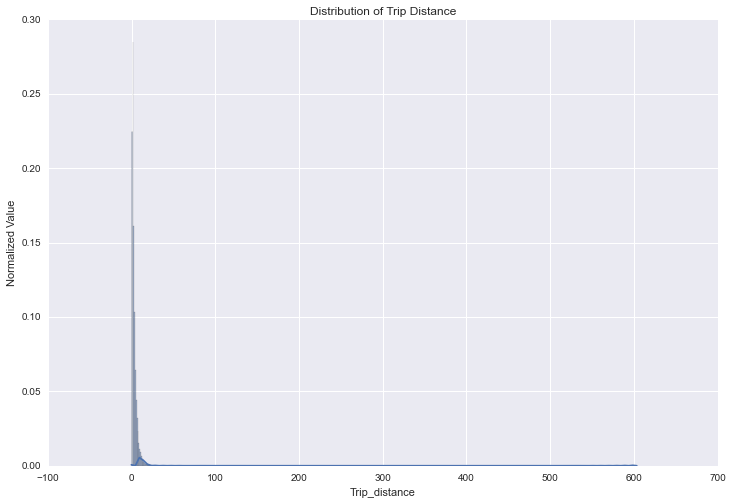

In [3]:
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.figsize": (12, 8)})
ax = sns.distplot(data['Trip_distance'],bins=603)
ax.set_ylabel('Normalized Value')
ax.set_title('Distribution of Trip Distance')

## if we use a lot of bins, histogram will approximate the distribution.

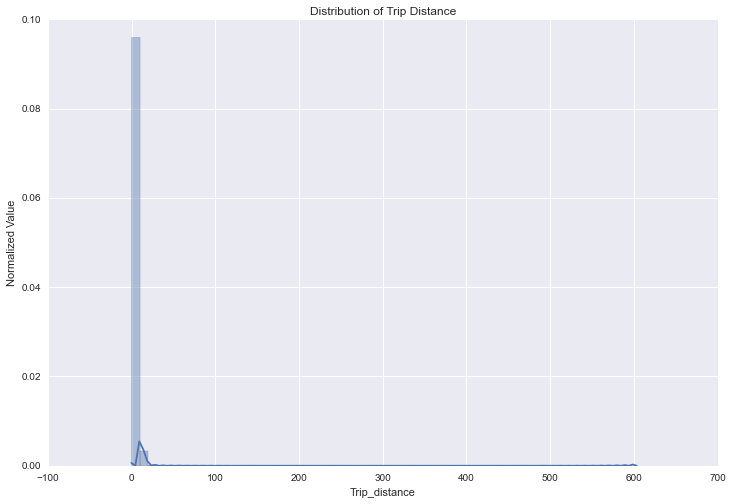

In [4]:
ax = sns.distplot(data['Trip_distance'],bins=60)
ax.set_ylabel('Normalized Value')
ax.set_title('Distribution of Trip Distance')

In [6]:
## bins
np.histogram(data['Trip_distance'],bins=60)

(array([1441739,   49911,    2819,     292,      98,      30,      16,
              6,       2,       3,       4,       3,       0,       1,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       1,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       1], dtype=int64),
 array([   0.        ,   10.05166667,   20.10333333,   30.155     ,
          40.20666667,   50.25833333,   60.31      ,   70.36166667,
          80.41333333,   90.465     ,  100.51666667,  110.56833333,
         120.62      ,  130.67166667,  140.72333333,  150.775     ,
         160.82666667,  170.87833333,  180.93      ,  190.98166667,
         201.03333333,  211.085  

###  Report any structure you find and any hypotheses you have about that structure.

_Structure_: Trip distance data is highly right skewed, range from 0 to around 600, where over 90% of the data are less than 10, only a few greater than 50.

_According to the histogram and its bins above, hypotheses are_：
1. Over 90% of the Green taxi trips won't go farther than 10 miles. In another words, customers take Green taxi as a way of short-distance transportation(from outer boroughs to manhattan mainly)

2. Trips over 50 miles are most likely outliers, these are very unlikely to fall into common cases, hence remain further inspection.



## Question 3

### Report mean and median trip distance grouped by hour of day.

_note_: There are two datetime here: pick_up_hour and drop_off_hour.  Using pick-up hour makes more sense since it represents more about the demand of green taxi during that hour, although I calculated both.

In [30]:
data[['pick_up_hour','drop_off_hour']]=data[['lpep_pickup_datetime','Lpep_dropoff_datetime']]\
                                                    .apply(pd.to_datetime).apply(lambda x: x.dt.hour)

In [31]:
data[['Trip_distance','pick_up_hour']].groupby('pick_up_hour').agg([np.mean,np.median])

Trip_distance       
                      mean median
pick_up_hour                     
0                 3.115276   2.20
1                 3.017347   2.12
2                 3.046176   2.14
3                 3.212945   2.20
4                 3.526555   2.36
5                 4.133474   2.90
6                 4.055149   2.84
7                 3.284394   2.17
8                 3.048450   1.98
9                 2.999105   1.96
10                2.944482   1.92
11                2.912015   1.88
12                2.903065   1.89
13                2.878294   1.84
14                2.864304   1.83
15                2.857040   1.81
16                2.779852   1.80
17                2.679114   1.78
18                2.653222   1.80
19                2.715597   1.85
20                2.777052   1.90
21                2.999189   2.03
22                3.185394   2.20
23                3.191538   2.22

###  We'd like to get a rough sense of identifying trips that originate or terminate at one of the NYC area airports. Can you provide a count of how many transactions fit this criteria, the average fair, and any other interesting characteristics of these trips.

In [93]:
## find latitude, longitude of three major airports in NYC area.
from geopy.geocoders import Nominatim
geolocator = Nominatim()
location = geolocator.geocode("JFK Airport")
location1 = geolocator.geocode("LaGuardia Airport")
location2 = geolocator.geocode("EWR Airport")
print("JFK Airport",location.latitude,location.longitude)
print("LaGuardia Airport",location1.latitude,location1.longitude)
print("EWR Airport",location2.latitude,location2.longitude)

('JFK Airport', 40.6429479, -73.7793732748521)
('LaGuardia Airport', 40.77550135, -73.8730603792763)
('EWR Airport', 40.68906405, -74.1772547503535)


In [76]:
## find address for the corresponding lat,long.
location_add = geolocator.reverse((location.latitude,location.longitude))
print(location_add.address)
location_add1 = geolocator.reverse((location1.latitude,location1.longitude))
print(location_add1.address)
location_add2 = geolocator.reverse((location2.latitude,location2.longitude))
print(location_add2.address)

John F. Kennedy International Airport, Terminal 5 Arrivals, Bayswater, Queens County, NYC, New York, 11010, United States of America
LaGuardia Airport, Departures, North Beach, Queens County, NYC, New York, 11369, United States of America
Newark Liberty International Airport, Terminal B - Departures, Newark, Essex County, New Jersey, 07114, United States of America


#### Methods I tried, but not good.
1. Zipcode approach too slow using Geopy library (logic: Geolocations in the same zipcode as the airports satisfies the requirement)
2. Geoshape approach, package installation problems (logic: see if each trip origination or destination is in these airport areas in the shapefile)
3. We have RateCodeID which identify JFK and Newark for us, which could help us limit the search scope to only LaGuardia Airport. Not work.  RateCodeID is not correct.

__note__: Code below not used.

    from uszipcode import ZipcodeSearchEngine

    search = ZipcodeSearchEngine()
    res = search.by_coordinate(39.122229, -77.133578, radius=1)
    print(res[0]['Zipcode'])
    data['location_pick_up']=data.apply(lambda x:(x['Pickup_latitude'],x['Pickup_longitude']), axis=1)
    data['location_drop_off']=data.apply(lambda x:(x['Dropoff_latitude'],x['Dropoff_longitude']), axis=1)
    data['zipcode_pickup']=data['location_pick_up']\
                            .apply(lambda x:search.by_coordinate(x[0],x[1],radius=5)[0]['Zipcode'] if x[0]!=0 and x[1]!=0 else 0)
    data['zipcode_dropoff']=data[['Dropoff_latitude','Dropoff_longitude']]\
                    .apply(lambda x:search.by_coordinate(x['Dropoff_latitude'],x['Dropoff_longitude'],radius=5)[0]['Zipcode']\
                           if x[0]!=0 and x[1]!=0 else 0, axis=1)
                       


    import shapefile
    reader = shapefile.Reader("strati.shp") 
    fields = reader.fields[1:]
    print fields
   
    field_names = [field[0] for field in fields]
    schema = dict((d[0],d[1:]) for d in reader.fields[1:])
    print schema
   
    for feat in reader.shapeRecords():
        print dict(zip(field_names, sr.record))





    location_dict={}
    for i in np.unique(np.round(data['Pickup_latitude'],3))[1:]:
        for j in np.unique(np.round(data['Pickup_longitude'],3))[:-1]:
            i=round(i,3)
            j=round(j,3)
            if i and j and (i,j) not in location_dict:
                print i,j
                print search.by_coordinate(i,j,radius=15)[0]['Zipcode']

        break

#### This works
Search by coordinate in uszipcode package gives us the zipcode for each lat, lon, so we can apply our first logic. but instead of apply it one by one in the logic 1, we use dictionary as a look up table to speed up. and I found that lat, long could round to the nearest 3 decimal and still give you similar position. so I use this approximation, thus decrease the number of buckets in the dictionary.

In [187]:
from uszipcode import ZipcodeSearchEngine

search = ZipcodeSearchEngine()
res = search.by_coordinate(39.122229, -77.133578, radius=1)
print(res[0]['Zipcode'])

location_dict={}
pick=[]
drop=[]
for i in range(data.shape[0]):
    pick_lat=round(data.iloc[i]['Pickup_latitude'],3)
    pick_lon=round(data.iloc[i]['Pickup_longitude'],3)
    drop_lat=round(data.iloc[i]['Dropoff_latitude'],3)
    drop_lon=round(data.iloc[i]['Dropoff_longitude'],3)
    if pick_lon and pick_lat:
        if (pick_lat,pick_lon) not in location_dict:
            zipcode=search.by_coordinate(pick_lat,pick_lon,radius=10)[0]['Zipcode']
            assert(len(zipcode)==5)
            location_dict[(pick_lat,pick_lon)]=zipcode
            pick.append(zipcode)
        else:
            pick.append(location_dict[(pick_lat,pick_lon)])
    else:
        pick.append(0)
    if drop_lon and drop_lat:
        if (drop_lat,drop_lon) not in location_dict:
            zipcode=search.by_coordinate(drop_lat,drop_lon,radius=10)[0]['Zipcode']
            assert(len(zipcode)==5)
            location_dict[(drop_lat,drop_lon)]=search.by_coordinate(drop_lat,drop_lon,radius=10)[0]['Zipcode']
            drop.append(zipcode)
        else:
            #print (drop_lat,drop_lon)
            drop.append(location_dict[(drop_lat,drop_lon)])
    else:
        drop.append(0)

In [188]:
len(location_dict)

48110

In [190]:
data['pick_zipcode']=pd.Series(pick)
data['drop_zipcode']=pd.Series(drop)
data.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Payment_type,Trip_type,pick_up_hour,drop_off_hour,location,zipcode_pickup,pick_up_lat_3,pick_up_lon_3,pick_zipcode,drop_zipcode
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,1,2.0,0,0,"(40.6849555969, -73.9794845581)",11217,40.685,-73.979,11217,11217
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,1,2.0,0,0,"(40.9122161865, -74.0107955933)",07621,40.912,-74.011,07621,07621
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,1,1.0,0,0,"(40.766708374, -73.9214096069)",11106,40.767,-73.921,11103,11103
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,2,1.0,0,0,"(40.7666778564, -73.9213867188)",11106,40.767,-73.921,11103,11102
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,2,1.0,0,0,"(40.7140464783, -73.9554824829)",11211,40.714,-73.955,11211,11206


In [191]:
data[['pick_zipcode','drop_zipcode']].to_csv("zipcode.csv",index=False)

In [203]:
airport_area=data[(data['pick_zipcode']=='11010') | (data['drop_zipcode']=='11010') | \
(data['pick_zipcode']=='11369') | (data['drop_zipcode']=='11369') | \
(data['pick_zipcode']=='07114') | (data['drop_zipcode']=='07114')]

### Around 21787 trips either originate from airport or head for the airport

In [204]:
airport_area.shape

(21787, 29)

### Mean distance of these trips are 18 miles

In [205]:
np.mean(airport_area['Fare_amount'])

18.033959700739008

In [ ]:
airport_area.describe()

In [415]:
## confirm RateCodeID is not right
airport_area[airport_area['RateCodeID']==2][['RateCodeID','drop_zipcode']]

,RateCodeID,drop_zipcode
61590,2,07114
103323,2,11369
150417,2,11369
199928,2,11369
319195,2,07114
510550,2,11369
721887,2,11369
856336,2,11369
870073,2,11369
873219,2,11369


#### Two conditions,  one for the trips that originate from airport, the other one that head to airport

In [226]:
dropoff_ratecode=airport_area[(airport_area['drop_zipcode']=='11010') \
             |(airport_area['drop_zipcode']=='11369')\
             |(airport_area['drop_zipcode']=='07114')]
dropoff_ratecode[['RateCodeID','drop_zipcode','Passenger_count','Trip_distance','Fare_amount',\
                  'Extra','improvement_surcharge','Tip_amount','Tolls_amount','Total_amount','Trip_type ']]\
                    .groupby('drop_zipcode').describe()

Extra   Fare_amount  Passenger_count    RateCodeID  \
drop_zipcode                                                                    
07114        count    729.000000    729.000000       729.000000    729.000000   
             mean       0.192730     75.629767         1.386831      2.805213   
             std        0.354855     20.933522         1.069632      1.205721   
             min        0.000000     -2.500000         0.000000      1.000000   
             25%        0.000000     65.000000         1.000000      3.000000   
             50%        0.000000     77.500000         1.000000      3.000000   
             75%        0.500000     86.500000         1.000000      3.000000   
             max        1.000000    165.000000         9.000000      5.000000   
11010        count     39.000000     39.000000        39.000000     39.000000   
             mean       0.384615     47.641026         1.435897      2.384615   
             std        0.352837     19.950580         1.095322      1.615963   
             min        0.000000     10.500000         1.000000      1.000000   
             25%        0.000000     37.000000         1.000000      1.000000   
             50%        0.500000     52.000000         1.000000      1.000000   
             75%        0.500000     56.500000         1.000000      4.000000   
             max        1.000000    100.000000         5.000000      5.000000   
11369        count  18766.000000  18766.000000     18766.000000  18766.000000   
             mean       0.337952     16.334896         1.415432      1.088298   
             std        0.383285     10.177594         1.089134      0.584491   
             min       -1.000000     -5.500000         0.000000      1.000000   
             25%        0.000000      9.500000         1.000000      1.000000   
             50%        0.000000     13.000000         1.000000      1.000000   
             75%        0.500000     22.000000         1.000000      1.000000   
             max        1.000000    300.000000         6.000000      5.000000   

                      Tip_amount  Tolls_amount  Total_amount  Trip_distance  \
drop_zipcode                                                                  
07114        count    729.000000    729.000000    729.000000     729.000000   
             mean      11.418807      9.591468     97.229616      20.356982   
             std       11.922632      6.868118     25.127337       7.135417   
             min        0.000000      0.000000     -3.300000       0.000000   
             25%        0.000000      9.750000     85.000000      16.300000   
             50%       11.000000      9.750000     96.550000      20.740000   
             75%       18.410000     11.750000    111.750000      25.500000   
             max      100.000000     50.000000    200.040000      57.470000   
11010        count     39.000000     39.000000     39.000000      39.000000   
             mean       2.386154      0.000000     51.150256      13.201026   
             std        4.662238      0.000000     20.323914       6.853849   
             min        0.000000      0.000000     11.300000       0.170000   
             25%        0.000000      0.000000     39.150000       9.670000   
             50%        0.000000      0.000000     54.100000      13.560000   
             75%        2.555000      0.000000     62.125000      18.635000   
             max       20.000000      0.000000    100.000000      35.800000   
11369        count  18766.000000  18766.000000  18766.000000   18766.000000   
             mean       1.940925      0.610915     20.007896       4.569909   
             std        3.011518      1.754865     12.998448       3.386243   
             min        0.000000      0.000000     -6.800000       0.000000   
             25%        0.000000      0.000000     11.300000       2.100000   
             50%        0.000000      0.000000     14.800000       3.470000   
             75%        

In [228]:
pickup_ratecode=airport_area[(airport_area['pick_zipcode']=='11010') \
             |(airport_area['pick_zipcode']=='11369')\
             |(airport_area['pick_zipcode']=='07114')]
pickup_ratecode[['RateCodeID','pick_zipcode','Passenger_count','Trip_distance','Fare_amount',\
                  'Extra','improvement_surcharge','Tip_amount','Tolls_amount','Total_amount','Trip_type ']]\
                .groupby('pick_zipcode').describe()

Extra  Fare_amount  Passenger_count   RateCodeID  \
pick_zipcode                                                                 
07114        count    45.000000    45.000000        45.000000    45.000000   
             mean      0.177778    58.780000         1.311111     3.533333   
             std       0.356044    45.984861         1.104170     1.878103   
             min       0.000000    -2.500000         0.000000     1.000000   
             25%       0.000000     3.000000         1.000000     1.000000   
             50%       0.000000    80.000000         1.000000     5.000000   
             75%       0.000000    92.000000         1.000000     5.000000   
             max       1.000000   140.000000         8.000000     5.000000   
11010        count     5.000000     5.000000         5.000000     5.000000   
             mean      0.300000    44.300000         1.800000     2.600000   
             std       0.447214    40.456149         1.303840     2.190890   
             min       0.000000    14.000000         1.000000     1.000000   
             25%       0.000000    14.000000         1.000000     1.000000   
             50%       0.000000    18.500000         1.000000     1.000000   
             75%       0.500000    75.000000         2.000000     5.000000   
             max       1.000000   100.000000         4.000000     5.000000   
11369        count  2506.000000  2506.000000      2506.000000  2506.000000   
             mean      0.298683    13.248452         1.408220     1.384677   
             std       0.367429    11.726218         1.038844     1.175460   
             min      -1.000000    -4.500000         0.000000     1.000000   
             25%       0.000000     7.000000         1.000000     1.000000   
             50%       0.000000    10.000000         1.000000     1.000000   
             75%       0.500000    14.500000         1.000000     1.000000   
             max       1.000000   190.000000         6.000000     5.000000   

                     Tip_amount  Tolls_amount  Total_amount  Trip_distance  \
pick_zipcode                                                                 
07114        count    45.000000     45.000000     45.000000      45.000000   
             mean     11.829111      0.261111     71.312444       3.562222   
             std      21.939230      1.751587     47.848750       7.161788   
             min       0.000000      0.000000     -3.300000       0.000000   
             25%       0.000000      0.000000     14.800000       0.000000   
             50%       0.000000      0.000000     90.000000       0.000000   
             75%      17.000000      0.000000    106.550000       1.300000   
             max      90.000000     11.750000    156.250000      21.300000   
11010        count     5.000000      5.000000      5.000000       5.000000   
             mean      0.000000      0.000000     45.080000       2.862000   
             std       0.000000      0.000000     39.749805       2.224381   
             min       0.000000      0.000000     15.300000       0.170000   
             25%       0.000000      0.000000     15.800000       1.080000   
             50%       0.000000      0.000000     19.300000       3.320000   
             75%       0.000000      0.000000     75.000000       4.130000   
             max       0.000000      0.000000    100.000000       5.610000   
11369        count  2506.000000   2506.000000   2506.000000    2506.000000   
             mean      0.917725      0.204964     15.418907       3.102945   
             std       2.924483      1.042874     13.527439       3.302588   
             min       0.000000      0.000000     -5.800000       0.000000   
             25%       0.000000      0.000000      8.300000       1.150000   
             50%       0.000000      0.000000     11.300000       2.060000   
             75%       0.000000      0.000000     16.545000       3.500000   
             max      55.000000      5.540000  

_Based on the information I found above_

1. Green Taxi Driver doesn't enter correct RateCodeIDs for trips. for example, trips going to JFK are not entered as code JFK, but standard fare most of the time.

2. For the customers taking Green taxi to the airports, over 90% of them went to Laguardia Airport. For the customers taking Green taxi head out of the airport, over 90% of them were picked up from Laguardia Airport.

3. Most of the time customers take Green Taxi to the airport alone. 

4. There are fewer taxi businesses for customers head out than head into the airport. And also, customers head out of the airport take Green Taxi as short distance tranportation tool.

5. Customers usually hail a green taxi to the airport, but pick up from EWR airport are more likely from dispatch.

6. Customers are more likely to give tips for trips from or to EWR airport.



## Question 4

_Process_:

(1) Data Processing based on assumptions and facts below:
    1. normal trip should have positive fare.
    2. tips normally are fewer than the fare.
    3. time difference between pickup and dropoff shouldn't be 0
    4. trip distance should be greater than 0
    5. payment type should be credit card, that's the only way tips are recorded in the data.
(2) Feature construction and selection
    1. Calculate time for each trip
    2. Calculate the hour that customers were picked up
    3. Trip type minus 1 to make it binary variable
    4. get rid of MTA tax, improvement surcharge because they are pretty much fixed.
(3) Model selection. (Random Forest and Gradient Boosting are used)

(4) Hyperparameter tuning using random search

(5) Model evaluation.(RMSE is 0.01, so the model is pretty good)

### Build a derived variable for tip as a percentage of the total fare.

derived_data=data[data['Fare_amount']>0]
derived_data['tip_total_percent']=derived_data['Tip_amount']/derived_data['Fare_amount']

In [265]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
derived_data[derived_data['tip_total_percent']<=1]['tip_total_percent'].describe()

count   1485622.000
mean          0.090
std           0.120
min           0.000
25%           0.000
50%           0.000
75%           0.213
max           1.000
Name: tip_total_percent, dtype: float64

In [266]:
derived_data1=derived_data[derived_data['tip_total_percent']<=1]
derived_data1.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Trip_type,pick_up_hour,drop_off_hour,location,zipcode_pickup,pick_up_lat_3,pick_up_lon_3,pick_zipcode,drop_zipcode,tip_total_percent
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979,40.685,-73.979,40.685,1,...,2.000,0,0,"(40.6849555969, -73.9794845581)",11217,40.685,-73.979,11217,11217,0.250
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.011,40.912,-74.011,40.912,1,...,2.000,0,0,"(40.9122161865, -74.0107955933)",07621,40.912,-74.011,07621,07621,0.000
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921,40.767,-73.914,40.765,1,...,1.000,0,0,"(40.766708374, -73.9214096069)",11106,40.767,-73.921,11103,11103,0.125
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921,40.767,-73.931,40.772,1,...,1.000,0,0,"(40.7666778564, -73.9213867188)",11106,40.767,-73.921,11103,11102,0.000
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955,40.714,-73.944,40.715,1,...,1.000,0,0,"(40.7140464783, -73.9554824829)",11211,40.714,-73.955,11211,11206,0.000


In [ ]:
derived_data1['time_diff']=derived_data1[['lpep_pickup_datetime','Lpep_dropoff_datetime']]\
                        .apply(lambda x: (pd.to_datetime(x['Lpep_dropoff_datetime'])\
                                          -pd.to_datetime(x['lpep_pickup_datetime'])).total_seconds(),axis=1)

In [299]:
derived_data1[derived_data1['time_diff']==0][['Tip_amount','Fare_amount','Total_amount','Trip_distance']].head()
derived_data1[['Payment_type','Tip_amount']].groupby(['Payment_type']).describe()

Tip_amount
Payment_type                  
1            count  698379.000
             mean        2.569
             std         2.408
             min         0.000
             25%         1.160
             50%         2.000
             75%         3.350
             max       120.000
2            count  779792.000
             mean        0.000
             std         0.015
             min         0.000
             25%         0.000
             50%         0.000
             75%         0.000
             max        13.260
3            count    3932.000
             mean        0.000
             std         0.000
             min         0.000
             25%         0.000
             50%         0.000
             75%         0.000
             max         0.000
4            count    3447.000
             mean        0.001
             std         0.067
             min         0.000
             25%         0.000
             50%         0.000
             75%         0.000
             max         3.950
5            count      72.000
             mean        0.000
             std         0.000
             min         0.000
             25%         0.000
             50%         0.000
             75%         0.000
             max         0.000

In [302]:
derive_data2=derived_data1[(derived_data1['time_diff']!=0)&(derived_data1['Payment_type']==1)& \
                           (derived_data1['Trip_distance'])>0]
derive_data2.shape

(690723, 32)

In [289]:
derive_data2.columns

Index([u'VendorID', u'lpep_pickup_datetime', u'Lpep_dropoff_datetime',
       u'Store_and_fwd_flag', u'RateCodeID', u'Pickup_longitude',
       u'Pickup_latitude', u'Dropoff_longitude', u'Dropoff_latitude',
       u'Passenger_count', u'Trip_distance', u'Fare_amount', u'Extra',
       u'MTA_tax', u'Tip_amount', u'Tolls_amount', u'Ehail_fee',
       u'improvement_surcharge', u'Total_amount', u'Payment_type',
       u'Trip_type ', u'pick_up_hour', u'drop_off_hour', u'location',
       u'zipcode_pickup', u'pick_up_lat_3', u'pick_up_lon_3', u'pick_zipcode',
       u'drop_zipcode', u'tip_total_percent', u'time', u'time_diff'],
      dtype='object')

#### histogram for tip as a percentage of fare.

(array([  9.59780000e+04,   9.07000000e+02,   9.15000000e+02,
          1.39800000e+03,   2.43000000e+03,   3.95000000e+03,
          4.84700000e+03,   5.28600000e+03,   7.74800000e+03,
          7.82500000e+03,   1.16800000e+04,   1.12560000e+04,
          1.05580000e+04,   1.02930000e+04,   9.91400000e+03,
          1.12760000e+04,   1.25200000e+04,   7.17800000e+03,
          9.46500000e+03,   5.09800000e+03,   5.71870000e+04,
          9.56120000e+04,   7.54000000e+04,   3.66410000e+04,
          2.72730000e+04,   2.59720000e+04,   2.74010000e+04,
          2.10770000e+04,   1.55700000e+04,   8.78400000e+03,
          1.21400000e+04,   8.95400000e+03,   9.47300000e+03,
          9.37800000e+03,   5.86900000e+03,   3.52300000e+03,
          4.43700000e+03,   3.31100000e+03,   1.68300000e+03,
          1.03700000e+03,   1.64900000e+03,   5.57000000e+02,
          7.27000000e+02,   3.90000000e+02,   8.01000000e+02,
          3.37000000e+02,   2.93000000e+02,   2.00000000e+02,
        

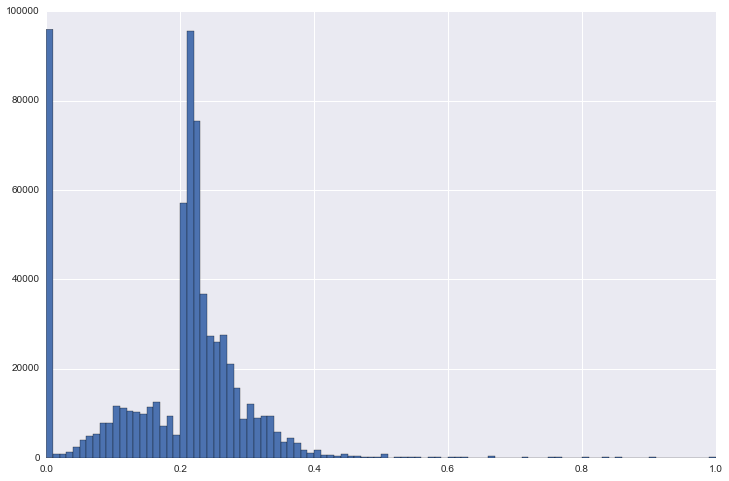

In [308]:
plt.hist(list(derive_data2['tip_total_percent']),bins=100)

In [ ]:
derive_data3=derive_data2[['Passenger_count','time_diff','tip_total_percent','pick_up_hour','Trip_distance','Fare_amount','MTA_tax','Tolls_amount','improvement_surcharge','Trip_type ']]
derive_data3['Trip_type ']=derive_data3['Trip_type ']-1
derive_data3.head()

#### Features used in the models

In [337]:
derive_data4=derive_data3[['tip_total_percent','Passenger_count','time_diff',\
                           'pick_up_hour','Trip_distance','Fare_amount','Trip_type ']]
derive_data4.head()

,tip_total_percent,Passenger_count,time_diff,pick_up_hour,Trip_distance,Fare_amount,Trip_type
2,0.125,1,154.000,0,0.590,4.000,0.000
5,0.247,1,281.000,0,1.070,5.500,0.000
6,0.000,1,298.000,0,1.430,6.500,0.000
8,0.243,1,284.000,0,1.330,6.000,0.000
11,0.265,1,126.000,0,0.700,4.000,0.000


### Build a predictive model for tip as a percentage of the total fare. 

Was thinking to make a model for each cluster. however, clustering is not used because it is recommended to use two clusters, which doesn't make a big difference.

    from sklearn import preprocessing

    scaler = preprocessing.MinMaxScaler()
    scale1=scaler.fit_transform(derive_data4)

    from scipy.cluster.vq import kmeans
    def elbow(X):
        df_kcurve = pd.DataFrame(columns = ['k', 'distortion']) 
        for i in range(1,10):
            _, distortion = kmeans(X, i)
            df_kcurve.loc[i] = [i, distortion]
        df_kcurve.plot(x="k", y="distortion")
    elbow(scale1)


In [346]:
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

rmse=[]
kf = KFold(derive_data4.shape[0], n_folds=10,shuffle=True)
def PredictiveModel(func,params):
    for train, test in kf:
        training_set,testing_set=derive_data4.iloc[train],derive_data4.iloc[test]
        feature_train,feature_test = training_set.drop(['tip_total_percent'], axis=1),\
                                    testing_set.drop(['tip_total_percent'], axis=1)

        training_x,training_y=feature_train,training_set['tip_total_percent'].as_matrix()
        testing_x,testing_y=feature_test,testing_set['tip_total_percent'].as_matrix()
        regr_rf = func(**params)
        regr_rf.fit(training_x,training_y)

        # Predict on new data
        y_rf = regr_rf.predict(testing_x)
        rmse.append(mean_squared_error(testing_y, y_rf))
    return rmse
        

In [341]:
params={'n_estimators': 10,'max_depth':10}
result_random=PredictiveModel(RandomForestRegressor,**params)

RMSE for 10 fold cross validation for Random Forest Regression

In [343]:
np.mean(result_random)

0.010640997872977858

In [349]:
params = {'n_estimators': 10, 'max_depth': 6, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
result_gradient=PredictiveModel(GradientBoostingRegressor,params)

RMSE for 10 fold cross validation for Gradient Boosting Regression

In [350]:
np.mean(result_gradient)

0.011078052934104349

Hyperparameter Tuning, too slow

In [374]:
from sklearn.grid_search import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from operator import itemgetter

def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")



def randomSearch(func,param_dist,X,y):
    n_iter_search = 20
    random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                       n_iter=n_iter_search)
    random_search.fit(X, y)
    return random_search


    clf=GradientBoostingRegressor(n_estimators=10)
    param_dist = {"max_depth": [3,5,None],
                  "max_features": sp_randint(1, 7),
                  "min_samples_split": sp_randint(1, 7),
                  "min_samples_leaf": sp_randint(1, 7),
                   "loss":["ls","lad"],
                  "learning_rate":[0.1,0.3]}
    X,Y=derive_data4.drop(['tip_total_percent'], axis=1),derive_data4['tip_total_percent']            
    RS1=randomSearch(clf,param_dist,X,Y)
    RS1.best_score_

    clf=RandomForestRegressor(n_estimators=10)
    param_dist = {"max_depth": [10,15],
                  "max_features": sp_randint(1, 7),
                  "min_samples_split": sp_randint(1, 7),
                  "min_samples_leaf": sp_randint(1, 7),
                  "bootstrap": [True, False]}
    X,Y=derive_data4.drop(['tip_total_percent'], axis=1),derive_data4['tip_total_percent']  
    RS2=randomSearch(clf,param_dist,X,Y)
    RS2.best_score_

## Question 5
### Can you build a visualization (interactive or static) of the trip data that helps us understand intra- vs. inter-borough traffic? Summarize data here

Find Zipcode in NYC

In [ ]:
zipdict={"Bronx":[10453, 10457, 10460,10458, 10467, 10468,10451, 10452, 10456,10454,\
                  10455, 10459, 10474,10463, 10471,10466, 10469, 10470, 10475],\
         "Brooklyn":[11212, 11213, 11216, 11233, 11238,11209, 11214, 11228,11204, 11218, 11219, 11230,\
                     11234, 11236, 11239,11223, 11224, 11229, 11235,11201, 11205, 11215, 11217, 11231,\
                    11203, 11210, 11225, 11226,11207, 11208,11211, 11222,11220, 11232,11206, 11221, 11237],
        "Manhattan":[10026, 10027, 10030, 10037, 10039,10001, 10011, 10018, 10019, 10020, 10036,\
                    10029, 10035,10010, 10016, 10017, 10022,10012, 10013, 10014,10004, 10005\
                     , 10006, 10007, 10038, 10280,10002, 10003, 10009,10021, 10028, 10044\
                     , 10065, 10075, 10128,10023, 10024, 10025,10031, 10032, 10033, 10034, 10040],
        "Queens":[11361, 11362, 11363, 11364,11354, 11355, 11356, 11357, 11358, 11359, 11360,11365\
                  , 11366, 11367,11412, 11423, 11432, 11433, 11434, 11435, 11436,11101, 11102, 11103\
                  , 11104, 11105, 11106,11374, 11375, 11379, 11385,11691, 11692, 11693, 11694, 11695\
                  , 11697,11004, 11005, 11411, 11413, 11422, 11426, 11427, 11428, 11429,11414, 11415\
                  , 11416, 11417, 11418, 11419, 11420, 11421,11368, 11369, 11370, 11372, 11373, 11377, 11378],
         "Staten Island":[10302, 10303, 10310,10306, 10307, 10308, 10309, 10312,10301, 10304, 10305,10314]}
zipNYC=[]
for key,value in zipdict.items():
    zipNYC.extend(value)

Clean data

In [397]:
data4vis=derived_data1[(derived_data1['time_diff']!=0)& (derived_data1['Trip_distance'])>0]
data4vis.shape

(1467023, 32)

In [398]:
data4vis1=data4vis[['pick_up_hour','pick_zipcode','drop_zipcode']]
data4vis1.head()

,pick_up_hour,pick_zipcode,drop_zipcode
2,0,11103,11103
3,0,11103,11102
4,0,11211,11206
5,0,10026,10030
6,0,11377,11372


Translate zipcode to the corresponding borough

In [404]:
data4vis1['source']=data4vis1['pick_zipcode'].apply(lambda x:[key for key,value in zipdict.items()\
                                                if int(x) in value][0] if int(x) in zipNYC else 0)
data4vis1['target']=data4vis1['drop_zipcode'].apply(lambda x:[key for key,value in zipdict.items()\
                                                if int(x) in value][0] if int(x) in zipNYC else 0)

In [402]:
data4vis2=data4vis1[(data4vis1.source!=0) & (data4vis1.target!=0)]
data4vis2.shape

(1315408, 5)

For visualization purpose, give 24 choice in the drop down menu is just too much for the users. hence I partition the hour in this way to make it better visualized and user friendly

In [ ]:
def hour_code_judge(val):
    if val>=0 and val<3:
        return 0
    elif val>=3 and val<6:
        return 1
    elif val>=6 and val<9:
        return 2
    elif val>=9 and val<12:
        return 3
    elif val>=12 and val<15:
        return 4
    elif val>=15 and val<18:
        return 5
    elif val>=18 and val<21:
        return 6
    else:
        return 7
data4vis2['hour_code']=data4vis2['pick_up_hour'].apply(hour_code_judge)

In [407]:
data4vis2.tail()

,pick_up_hour,pick_zipcode,drop_zipcode,source,target,hour_code
1494921,23,11106,11360,Queens,Queens,7
1494922,23,11217,11215,Brooklyn,Brooklyn,7
1494923,23,11231,11232,Brooklyn,Brooklyn,7
1494924,23,11235,11235,Brooklyn,Brooklyn,7
1494925,23,11238,11205,Brooklyn,Brooklyn,7


In [ ]:
data4vis2['link']=data4vis2[['source','target']].apply(lambda x: (x['source'],x['target']),axis=1)
data4vis2['val']=1

Get data to the format that is easy for us to visualize.

In [413]:
data4vis3=data4vis2[['link','hour_code','val']].groupby(['hour_code','link']).count()
data4vis3.reset_index().to_csv("vis.csv",index=False)

In [420]:
data4vis3.reset_index().head()  ## This is the data we need, information about network source, target, value and corresponding hours.

,hour_code,link,val
0,0,"(Bronx, Bronx)",2983
1,0,"(Bronx, Brooklyn)",38
2,0,"(Bronx, Manhattan)",1072
3,0,"(Bronx, Queens)",73
4,0,"(Brooklyn, Bronx)",117


Output this data to vis.csv file, then use d3 to visualize traffic in NYC  __see index.html file__ for code, visualization looks like the plot below

Story from the visualization:

I represent 5 borough as 5 nodes in the network, for a specific timeframe you pick in the dropdown menu, we can visualize the traffic inter and intra the boroughs.
If there are trips going from one borough to another or (itself), there will be links connecting nodes. The thickness and opacity of the link represent the number of trips on 
this route in September.

As we could see, New Yorkers usually take green taxi to the same borough as where they are picked up as most thick links are the links reference to the nodes themselves

For intra borough trips, in the early morning(0:00-5:59 am), Brooklyn and Queens have top 2 traffic among 5 boroughs. 
however, as the morning rush hour coming in 6-11:59 am, Mahanttan turns out to be the one that has the most traffic. 
then as night comes, Mahanttan's traffic come down, Brooklyn and Queens' back up. This makes sense since Manhattan is the most busy area in the daytime.

For inter borough trips, Brooklyn to Mahanttan route is the most busy for green taxi. In the early morning(0:00-2:59 am), there is only a few inter borough trips.
but as the time goes by, we could detect the route between Brooklyn and Manhattan become more and more significant, 
other inter borough route is also getting busy, but not as busy as the former. 

<img src="visual-q5.jpg" />
